# Исследование объявлений о продаже квартир

---
## Цель проекта

<div style="border:solid orange 2px; padding: 5px">
<div class="alert alert-info"> <b>Провести исследование на основе предоставленных данных и выполнить:</b></div>

- __*Описание имеющихся параметров*__
- __*Оценку времени, затраченного на продажу квартиры*__
- __*Оценку факторов больше всего влияющих на общую (полную) стоимость объекта*__
- __*Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.*__
- __*Оценку зависимости, как стоимость объектов зависит от расстояния до центра города*__

---
## Описание проекта

__*В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Наша задача — найти интересные особенности и зависимости, которые существуют на рынке недвижимости.*__

---
### *Описание данных*

__*Для исследования получен csv-файл `1.csv`*__

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

---
## Ход исследования

1. Изучение общей информации о данных
2. Предобработка данных
3. Проведение исследования по поставленным целям

---
## Подключение модулей (import modules)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import Counter
import warnings

---
## Загрузка данных (data loading)

Считаем данные из имеющегося csv-файла real_estate_data.csv.

In [2]:
#  Используем блок try - except для обработки исключений и гарантированного доступа к файлу.
#  Считаем данные из csv-файла в датафрейм и сохраним его в переменной 'data'.
try:
    df = pd.read_csv('datasets/real_estate_data.csv')
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

Выведем первые 20 строчек DataFrame `data` на экран, для ознакомления с DF. (сокр. 'DF' далее по тексту)

In [3]:
#  Метод head() позволит отобразить первые 20 строк нашего DF.
df.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Обнаружили, что при формировании csv файла использовался не стандартный разделитель столбцов (;), а '\t'. Укажем верный тип разделителя.

In [4]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep=r'\t', engine='python')
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep=r'\t', engine='python')
# Были использованы сырые строки, как один из вариантов экранирования строк, чтобы исключить возможную интерпретацию Python'ом '\t', как символа для горизонтальной табуляции.

In [5]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


---
## Разведочный анализ данных (exploratory data analysis, EDA)

Выведем основную информацию о DF, для получения первичных сведений об имеющихся данных.

In [6]:
#  Вывод осуществим с помощью метода `info()`
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

---
### *Переименование столбцов*

Необходимо привести в нормальный вид названия трех столбцов: cityCenters_nearest, parks_around3000, ponds_around3000.

In [7]:
df = (
    df
    .rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                     'parks_around3000': 'parks_around_3000',
                     'ponds_around3000': 'ponds_around_3000'})
)

### *Первичные выводы после изучения общей информации о данных и ознакомления с описанием имеющихся данных.*

<div style="border:solid green 2px; padding: 5px">

__*После изучения общей информации о предоставленных данных:*__

* Данные можно разделить по методу их получения: введенные пользователем (вписаны пользователем) и картографические (получены автоматически на основе картографических данных), системные (были получены из бд, где фиксируется состояние объявлений). Это стоит держать в голове для верного понимания механизма возникновения пропусков в каждом конкретном случае.
    * Пользовательские данные (введенные пользователем) находятся в следующих столбцах:
        * balcony
        * ceiling_height
        * floor
        * floors_total
        * is_apartment
        * kitchen_area
        * living_area
        * locality_name
        * open_plan
        * rooms
        * studio
        * total_area
        * total_images
        * last_price
    * Картографические (получены автоматически на основе картографических данных) находятся в следующих столбцах:
        * airports_nearest
        * city_centers_nearest
        * parks_around_3000
        * parks_nearest
        * pounds_around_3000
        * pounds_nearest
    * Системные (были получены из бд, где фиксируется состояние объявлений) находятся в следующих столбцах:
        * firs_day_exposition
        * days_exposition

* В 14 столбцах обнаружены пропуски значений: в 12 столбцах пропущены количественные значения, в одном столбце `locality_name` пропущены номинальные значения, в одном столбце (`is_apartment`) пропущены бинарные (булевы) значения.

Проведем первичное ознакомление с количественным данными.

In [8]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


---
## Предварительная обработка данных (preprocessing)

Переведем значения столбца `last_price` в более удобный для чтения вид, выразим значения в млн. рублей. Также преобразуем значения столбцов `airports_nearest` и `city_centers_nearest` выразим значения в км.

In [9]:
df[['city_centers_nearest', 'airports_nearest']] = df[['city_centers_nearest', 'airports_nearest']] / 1000

In [10]:
df['last_price'] = df['last_price'] / 1000000

---
### *Обработка пропусков*

В нескольких столбцах имеются пропущенные значения. Отобразим соотношение пропущенных значений к общему количеству строк в процентах, чтобы увидеть, какой объем данных пропущен в каждом из параметров.

In [11]:
pd.DataFrame(round(df.isna().mean() * 100)) \
    .rename(columns={0: 'space'}).query('space > 0') \
    .sort_values(by='space', ascending=True) \
    .style.background_gradient('coolwarm')

,space
living_area,8.000000
kitchen_area,10.000000
days_exposition,13.000000
airports_nearest,23.000000
city_centers_nearest,23.000000
parks_around_3000,23.000000
ponds_around_3000,23.000000
ceiling_height,39.000000
balcony,49.000000
ponds_nearest,62.000000


Рациональным подходом будет начать восстановление пропущенных значений со столбцов, где количество пропущенных значений наименьшее, для наименьшего искажения имеющихся изначальных закономерностей в процессе восстановления пропущенных значений.
Далее будем придерживаться этой логики и идти от наименьшего количества пропусков к наибольшему.

In [12]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean() * 100)
            .to_frame()
            .rename(columns={0: 'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19, 6), rot=-5, legend=False, fontsize=16)
            .set_title('Пример' + "\n", fontsize=22, color='SteelBlue')
        )
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

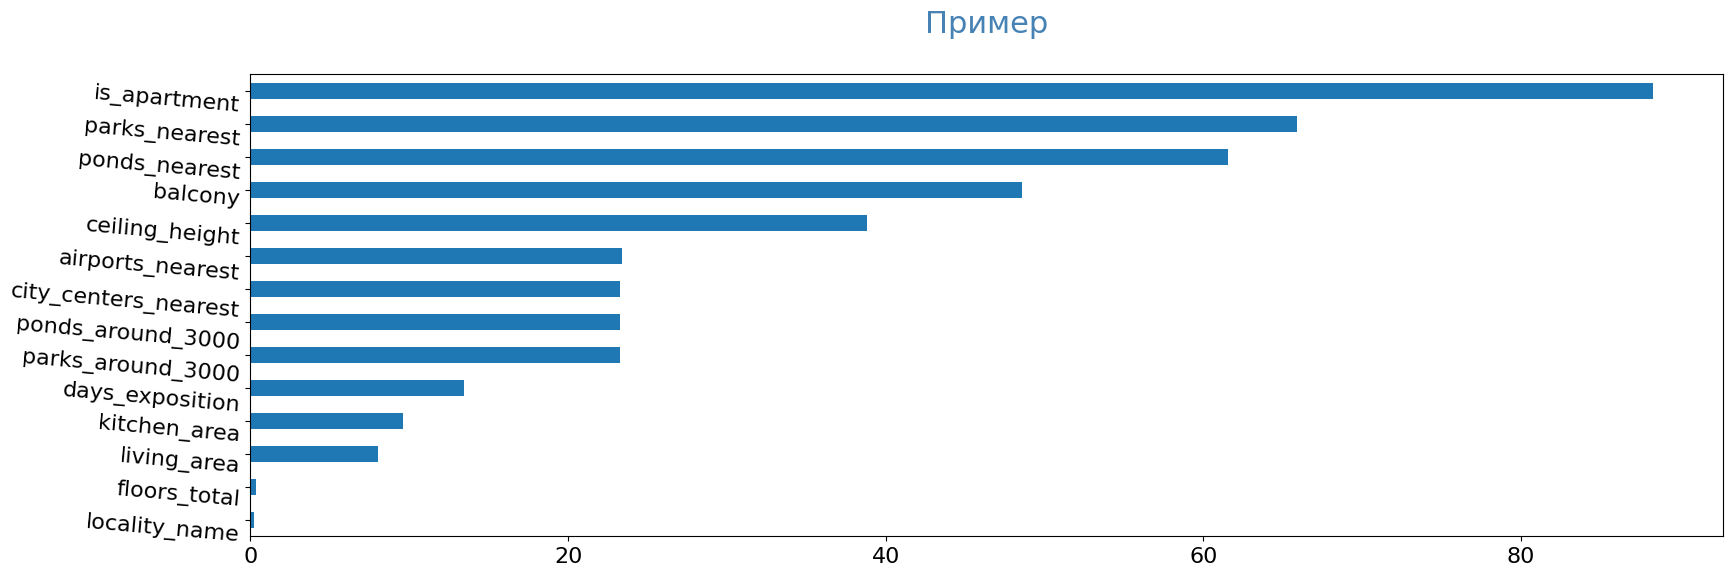

In [13]:
pass_value_barh(df)

Начнем заполнение пропусков со столбца `locality_name`.
Сначала было предположено, что данные в этом столбце заполняются пользователями, но тогда не сходится, если бы это было так и этот столбец являлся необязательным, тогда было бы в разы больше пропущенных значений. В этом DF явно не достает обязательных данных(столбца) - точный адрес(улица и номер дома), который выставляется на продажу, иначе объявление просто не выложить. Логично предполагать, что данный столбец является обязательным для заполнения в современных приложениях (как правило, заполненные данные синхронизируются с картографическими, которые загружены в бд, что не дает пользователю возможности ввести некорректные данные). Вероятнее всего данные в localilty_name подгружаются, как метка из картографических данных, тогда есть вопросы, почему в словаре данных в бд есть двусмысленные трактовки одной и той же геопозиции.
Обнаруженную проблематику необходимо отправить техническим специалистам.

In [14]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8.600000,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23.478,4.258,0.0,NaN,0.0,NaN,147.0
2033,6,5.398000,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3.351765,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22.041,17.369,0.0,NaN,1.0,374.0,276.0
2632,2,5.130593,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22.041,17.369,0.0,NaN,1.0,374.0,256.0
3574,10,4.200000,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27.419,8.127,0.0,NaN,1.0,603.0,45.0
4151,17,17.600000,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25.054,3.902,1.0,485.0,3.0,722.0,869.0
4189,7,9.200000,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21.774,3.039,1.0,690.0,1.0,953.0,223.0
4670,1,5.500000,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26.534,5.382,1.0,446.0,1.0,376.0,350.0
5343,19,13.540000,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10.556,9.538,1.0,67.0,0.0,NaN,303.0
5707,7,3.700000,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21.460,16.788,0.0,NaN,1.0,170.0,49.0


Обработаем возможное наличие пропусков с нестандартным значением пропуска - None (NoneType), заменив на значение NaN (Not a Number).

In [15]:
df['locality_name'] = df['locality_name'].replace([None], np.nan)

Можно произвести восстановление, установив соответствие с удаленностью от центра `city_centers_nearest` и `airports_nearest`.
Проверим, есть ли исключения, где нам будет не хватать данных для восстановления (наличие NaN в вышеперечисленных столбцах).

In [16]:
df[(df['locality_name'].isna()) & (df['city_centers_nearest'].isna() | (df['airports_nearest'].isna()))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2033,6,5.39800,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3.61100,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5.98500,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1.75000,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3.38000,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.0,3,NaN,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6.04755,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.5,2,False,...,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5.88675,83.5,2018-07-30T00:00:00,2,NaN,9.0,36.6,2,False,...,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3.00000,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


Восстановление этих 8 исключений не представляется возможным, так как невозможно установить еще какую-либо значительную взаимосвязь в данных. Восстановим остальные пропущенные значения, где пропуски в этих двух столбцах отсутствуют.

In [17]:
# Создадим функцию, которая будет принимать строку DF со значением NaN в столбце locality_name, будем брать оттуда значения расстояния до центра города и до аэропорта. Методом логической индексации выделим из нашего DF те строки, которые удовлетворяют заданному условию, увеличив отклонение для диапазона на +- 2 км для каждого из двух параметров.
def recover_locality(x):
    temp = df[(df['city_centers_nearest'] <= x['city_centers_nearest'] + 2) &
              (df['city_centers_nearest'] >= x['city_centers_nearest'] - 2) &
              (df['airports_nearest'] <= x['airports_nearest'] + 2) &
              (df['airports_nearest'] >= x['airports_nearest'] - 2)]['locality_name']
    # В переменной temp получим объект типа Series со значениями, включающими в себя обозначение населенного пункта и значение NaN, чтобы вернуть значение населенного пункта, пройдемся циклом по объекту Series и достанем оттуда значение населенного пункта.
    for i in temp:
        if i != np.nan:
            return i
    return np.nan

Применим созданную функцию к строкам, где в столбце locality_name есть пропущенные значения (NaN).

In [18]:
# Используем метод apply, установив параметр axis=1 (итерируемся по строкам).
df.loc[df['locality_name'].isna(), 'locality_name'] = df[
    df['locality_name'].isna()].apply(recover_locality, axis=1)

Проведем повторную проверку.

In [19]:
df[(df['locality_name'].isna()) & (df['city_centers_nearest'].isna() | (df['airports_nearest'].isna()))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2033,6,5.39800,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3.61100,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5.98500,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1.75000,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3.38000,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.0,3,NaN,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6.04755,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.5,2,False,...,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5.88675,83.5,2018-07-30T00:00:00,2,NaN,9.0,36.6,2,False,...,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3.00000,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


In [20]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2033,6,5.39800,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3.61100,53.5,2017-04-27T00:00:00,1,NaN,4.0,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5.98500,79.8,2018-07-30T00:00:00,3,NaN,9.0,NaN,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1.75000,72.9,2018-10-27T00:00:00,3,NaN,5.0,47.3,2,NaN,...,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3.38000,56.0,2017-11-06T00:00:00,2,2.7,4.0,29.0,3,NaN,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6.04755,80.1,2018-07-30T00:00:00,2,NaN,9.0,30.5,2,False,...,29.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5.88675,83.5,2018-07-30T00:00:00,2,NaN,9.0,36.6,2,False,...,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3.00000,35.0,2018-01-02T00:00:00,1,2.6,16.0,16.0,7,False,...,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


Удалим оставшиеся 8 строк с пропущенными значениями в столбце locality_name из-за невозможности их достоверного восстановления и их малого количества относительно общего размера DF.

In [21]:
df.dropna(subset=['locality_name'], inplace=True)

In [22]:
df[df['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Выведем оставшееся количество строк DF, чтобы удостовериться в корректном удалении.

In [23]:
df.shape[0]

23691

Для дальнейшей удобной и корректной работы удалим неявные дубликаты в восстановленном столбце.

In [24]:
# Для оценки выведем отсортированные по алфавиту уникальные значения.
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Приведем все значения в нижний регистр.

In [25]:
# Приведем все значения в нижний регистр.
df['locality_name'] = df['locality_name'].str.lower()
# Одним из часто встречающихся паттернов является одновременное использование двух букв - ё и е. Заменим букву ё на букву е.
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [26]:
df['locality_name'].nunique()

330

In [27]:
purpose_unique = df[
    'locality_name'].unique().tolist()  # загружаем все уникальные значения столбца purpose в список purpose_unique
stemmed_prp_unique_words = []

for frase in purpose_unique:  # frase по очереди примет значение каждой отдельной строки purpose_unique
    for word in frase.split():  # word по очереди примет значение каждого отдельного слова строки frase
        stemmed_prp_unique_words.append(word)

Counter(stemmed_prp_unique_words)
#выводим словарь, в котором ключи — уникальные слова, встречающееся в столбце purpose, а значения это количество раз, сколько данные слова встретились.

Counter({'санкт-петербург': 1,
         'поселок': 167,
         'шушары': 1,
         'городской': 13,
         'янино-1': 1,
         'парголово': 1,
         'мурино': 2,
         'ломоносов': 1,
         'сертолово': 1,
         'петергоф': 1,
         'пушкин': 1,
         'деревня': 106,
         'кудрово': 2,
         'коммунар': 1,
         'колпино': 1,
         'городского': 30,
         'типа': 30,
         'красный': 1,
         'бор': 6,
         'гатчина': 1,
         'федоровское': 2,
         'выборг': 1,
         'кронштадт': 1,
         'кировск': 1,
         'новое': 1,
         'девяткино': 1,
         'металлострой': 1,
         'лебяжье': 1,
         'сиверский': 1,
         'молодцово': 1,
         'кузьмоловский': 1,
         'садовое': 4,
         'товарищество': 5,
         'новая': 2,
         'ропша': 2,
         'павловск': 1,
         'пикколово': 1,
         'всеволожск': 1,
         'волхов': 1,
         'кингисепп': 1,
         'приозерск': 1,
         

Чтобы не затронуть нужные ключевые слова в названиях населенных пунктов установим значение количества повторений на 10+(село пр.).

In [28]:
def rename(x):
    container = x.split()
    s = []
    for i in container:
        if i == container[-1] or Counter(stemmed_prp_unique_words)[i] < 10:
            s.append(i)
    return ' '.join(s)

In [29]:
df['locality_name'] = df['locality_name'].apply(rename)

In [30]:
sorted(df.locality_name.unique())

['агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичево',
 'имени морозова',
 'имени свердл

Дочистим получившиеся данные вручную.

In [31]:
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('станции ', '')
df['locality_name'] = df['locality_name'].str.replace('коттеджный ', '')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной ', '')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '')
df['locality_name'] = df['locality_name'].str.replace('пансионат ', '')
df['locality_name'] = df['locality_name'].str.replace('платформа ', '')

In [32]:
sorted(df.locality_name.unique())

['69-й километр',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зеленый бор',
 'зимитицы',
 'ивангород',
 'извара',
 

Получили очищенные от неявных дубликатов данные в столбце locality_name.

In [33]:
# check
df.locality_name.nunique()

305

Приступим к восстановлению данных в столбце floors_total.

Выведем сводную таблицу с медианными значениями для каждого уникального значения locality_name.

In [34]:
median_value_locality = df.groupby('locality_name') \
    .agg({'floors_total': 'median'}) \
    .sort_values(by='floors_total', ascending=False)
median_value_locality

,floors_total
locality_name,
парголово,25.0
мурино,19.0
кудрово,18.0
петро-славянка,18.0
лаврики,17.0
...,...
борисова грива,2.0
сижно,1.0
каськово,1.0


<Axes: xlabel='floors_total', ylabel='Count'>

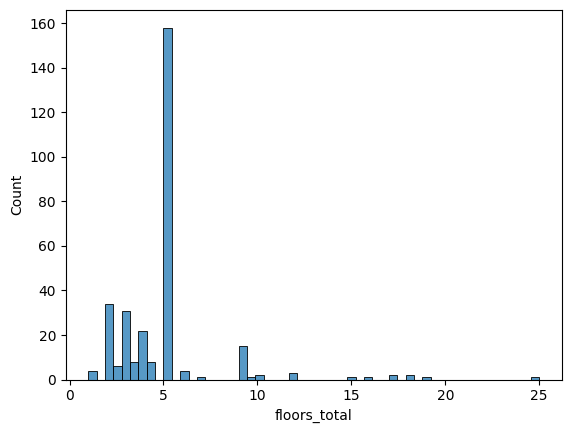

In [35]:
sns.histplot(median_value_locality['floors_total'])

Из наших данных видно, что количество различных местоположений из locality_name, где медианное значение равняется 5 сильно превозобладает над другими медианными значениями.
Из графика видна неравномерность распределения медианного значения количества этажей по различным геолокациям.
Исходя из этого разумным решением будет использование функции, которая восстановит пропущенные значения медианным значением свойственным для каждого из представленных регионов.

In [36]:
def recover_floors_total(x):
    not_null_df = df[(df['airports_nearest'].notna())
                     & (df['city_centers_nearest'].notna())
                     & (df['floors_total'].notna())]
    for i in range(2, 1000, 4):
        temp = not_null_df[(not_null_df['city_centers_nearest'] <= x['city_centers_nearest'] + i / 100) &
                           (not_null_df['city_centers_nearest'] >= x['city_centers_nearest'] - i / 100) &
                           (not_null_df['airports_nearest'] <= x['airports_nearest'] + i / 100) &
                           (not_null_df['airports_nearest'] >= x['airports_nearest'] - i / 100)][
            'floors_total'].median()
        if np.ceil(temp) > 0 and np.ceil(temp) >= x['floor']:
            return np.ceil(temp)
    return np.nan


df.loc[df['floors_total'].isna(), 'floors_total'] = (
    df[df['floors_total'].isna()]
    .apply(lambda x: int(df[df['locality_name'] == x['locality_name']]['floors_total'].median()) if x['floor'] <= int(
        df[df['locality_name'] == x['locality_name']]['floors_total'].median()) else np.nan, axis=1))

In [37]:
df.loc[(df['locality_name'] == 'санкт-петербург') & (df['floors_total'].isna()), 'floors_total'] = (
    df.query('locality_name == "санкт-петербург" and floors_total.isna()')
    .apply(recover_floors_total, axis=1)
)

In [38]:
df.query('floors_total.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
6030,3,10.90,116.23,2017-05-05T00:00:00,4,NaN,NaN,NaN,24,NaN,...,NaN,0.0,санкт-петербург,35.234,14.674,0.0,NaN,1.0,844.0,83.0
8478,19,13.50,77.80,2019-04-17T00:00:00,2,2.80,NaN,39.41,21,NaN,...,13.27,2.0,санкт-петербург,12.838,11.477,1.0,593.0,1.0,130.0,NaN
10058,9,3.35,25.00,2018-09-10T00:00:00,1,2.65,NaN,17.00,21,NaN,...,3.50,NaN,шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.0
14094,5,3.29,33.00,2018-02-01T00:00:00,1,NaN,NaN,NaN,17,NaN,...,NaN,NaN,новое девяткино,NaN,NaN,NaN,NaN,NaN,NaN,440.0
20146,16,3.85,36.00,2018-10-12T00:00:00,1,NaN,NaN,19.00,15,NaN,...,8.50,NaN,стрельна,28.276,23.454,0.0,NaN,0.0,NaN,183.0


После заполнения медианным значением по регионам, с учетом проверки на условие того, что ['floors_total'] >= ['floor'], осуществили заполнение с помощью другой функции, которая производит заполнение на основе удаленности от центра города и аэропорта, что позволило восстановить 25 значений для города Санкт-Петербург, осталось 5 незаполненных строк, удалим их.

In [39]:
df.dropna(subset=['floors_total'], inplace=True)
df.reset_index(drop=True, inplace=True)

Перейдем к восстановлению данных в столбце living_area, которые были пропущены при заполнении пользователем.
Наилучшим вариантом восстановления является восстановление через зависимость с 'total_area'.

In [40]:
df.query('total_area < living_area + kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
184,7,2.60000,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,NaN,...,6.20,NaN,санкт-петербург,13.952,15.031,0.0,NaN,1.0,824.0,12.0
545,9,4.70000,23.80,2018-12-28T00:00:00,1,NaN,18.0,20.00,9,NaN,...,5.00,NaN,санкт-петербург,9.731,11.849,0.0,NaN,0.0,NaN,108.0
551,8,3.10000,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,NaN,...,9.28,2.0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0
601,12,5.60000,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,NaN,...,7.00,2.0,санкт-петербург,50.477,13.252,2.0,220.0,1.0,1250.0,167.0
696,1,3.36493,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,санкт-петербург,43.396,12.153,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21813,20,2.45000,44.00,2019-02-12T00:00:00,2,27.00,2.0,38.00,2,False,...,8.60,2.0,большая ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21857,12,2.60000,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.60,6,NaN,...,8.00,2.0,сосновый бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21903,14,11.99000,91.40,2016-05-16T00:00:00,2,NaN,16.0,62.00,12,NaN,...,32.40,0.0,санкт-петербург,10.934,12.551,0.0,NaN,0.0,NaN,93.0
21944,0,5.20000,46.00,2018-07-20T00:00:00,2,NaN,5.0,44.00,5,NaN,...,8.00,1.0,санкт-петербург,14.103,15.182,1.0,488.0,0.0,NaN,7.0


In [41]:
df['living_area'].corr(df['total_area'])

0.9395561266275431

In [42]:
def recover_living_area(x):
    temp = df[(df['total_area'] <= x['total_area'] + 3) &
              (df['total_area'] >= x['total_area'] - 3)]['living_area'].median()
    return temp

In [43]:
# Был использован менеджер подавления предупреждений warning для того, чтобы избежать предупреждения RuntimeWarning.
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    df.loc[df['living_area'].isna(), 'living_area'] = df[
        df['living_area'].isna()].apply(recover_living_area, axis=1)

In [44]:
df[df['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3675,12,28.789,441.98,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,санкт-петербург,20.552,5.181,0.0,NaN,0.0,NaN,NaN
5892,3,230.000,500.00,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.00,0.0,санкт-петербург,32.440,5.297,0.0,NaN,2.0,198.0,50.0
15010,8,150.000,500.00,2016-01-13T00:00:00,4,3.2,7.0,NaN,7,NaN,...,NaN,0.0,санкт-петербург,33.058,6.150,3.0,209.0,3.0,531.0,303.0
22119,14,27.000,422.20,2018-10-18T00:00:00,5,2.7,13.0,NaN,11,NaN,...,NaN,NaN,санкт-петербург,46.625,16.554,0.0,NaN,0.0,NaN,NaN


In [45]:
df.dropna(subset=['living_area'], inplace=True)
df.reset_index(drop=True, inplace=True)

Синтетическое заполнение столбца kitchen_area не представляется возможным, так как изначально множество пользователей путают категории между собой и не придерживаются общей правильной логики заполнения.

Перейдем к восстановлению столбцов airports_nearest и city_centers_nearest.

In [46]:
df[(df['locality_name'] == 'гатчина') & (df['city_centers_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
47,17,3.60,56.1,2018-10-18T00:00:00,3,NaN,4.0,42.5,3,NaN,...,5.7,1.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
64,13,3.10,44.3,2017-11-07T00:00:00,2,2.50,5.0,29.0,5,NaN,...,5.3,NaN,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,143.0
174,8,2.10,31.6,2018-10-16T00:00:00,1,NaN,5.0,17.5,4,NaN,...,5.5,1.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,37.0
298,9,2.65,42.8,2017-04-25T00:00:00,2,NaN,5.0,30.0,3,NaN,...,4.5,0.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,49.0
355,17,3.60,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23329,3,2.30,34.0,2016-06-17T00:00:00,1,NaN,13.0,16.0,13,False,...,10.0,0.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,197.0
23436,5,3.00,55.5,2016-04-13T00:00:00,3,NaN,5.0,37.2,3,False,...,6.1,0.0,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,161.0
23460,3,1.45,138.0,2018-07-06T00:00:00,3,NaN,2.0,58.0,2,NaN,...,12.0,NaN,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,52.0
23513,0,3.00,30.0,2018-03-28T00:00:00,1,2.55,5.0,17.0,3,NaN,...,NaN,NaN,гатчина,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [47]:
df[(df['locality_name'] == 'гатчина') & (~df['city_centers_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [48]:
df[(df['locality_name'] == 'красный бор') & (df['city_centers_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
37,10,1.990,45.8,2017-10-28T00:00:00,2,2.5,5.0,27.5,1,NaN,...,NaN,NaN,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
514,10,1.700,32.4,2018-11-12T00:00:00,1,2.7,5.0,18.0,1,NaN,...,10.0,NaN,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,136.0
3969,9,2.700,47.5,2019-03-16T00:00:00,2,NaN,5.0,28.4,1,NaN,...,7.7,NaN,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,12.0
4770,9,2.700,62.8,2016-04-27T00:00:00,4,2.5,5.0,45.8,5,NaN,...,6.2,1.0,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,779.0
9539,10,1.950,36.6,2017-12-10T00:00:00,1,NaN,2.0,17.5,1,NaN,...,NaN,NaN,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,44.0
12305,20,2.360,48.5,2018-07-17T00:00:00,2,2.5,3.0,26.6,2,NaN,...,10.4,1.0,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,276.0
18893,9,2.900,63.2,2016-04-18T00:00:00,4,2.5,5.0,45.8,5,NaN,...,6.2,1.0,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,788.0
20996,12,1.099,44.0,2018-04-05T00:00:00,2,2.5,2.0,28.0,1,NaN,...,6.0,NaN,красный бор,NaN,NaN,NaN,NaN,NaN,NaN,159.0


In [49]:
df[(df['locality_name'] == 'красный бор') & (~df['city_centers_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Проанализировав характер пропусков в данных двух столбцах мы приходим к выводу, что пропуски в данных столбцах характерны для субъектов, которые не входят в состав Санкт-Петербурга, не являются его частью.

In [50]:
df[(df['locality_name'] == 'санкт-петербург') & (df['city_centers_nearest'].isna() | df['airports_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
81,9,10.949,68.00,2018-12-27T00:00:00,1,NaN,10.0,40.9,6,NaN,...,NaN,NaN,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,20,4.200,38.30,2019-04-16T00:00:00,1,2.60,16.0,19.8,10,NaN,...,10.1,2.0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,11,9.899,101.00,2018-12-12T00:00:00,3,3.00,5.0,62.0,3,NaN,...,15.0,NaN,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,18,18.700,109.70,2018-02-03T00:00:00,3,2.75,21.0,57.2,13,NaN,...,15.3,1.0,санкт-петербург,NaN,13.355,1.0,735.0,0.0,NaN,112.0
742,7,37.000,161.00,2016-05-22T00:00:00,3,NaN,9.0,84.0,8,NaN,...,NaN,0.0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21940,19,130.000,431.00,2017-10-02T00:00:00,7,3.70,8.0,220.0,5,NaN,...,20.0,5.0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0
22538,5,3.415,31.65,2019-04-16T00:00:00,1,NaN,24.0,17.0,14,NaN,...,8.7,2.0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22612,8,8.600,74.90,2019-03-14T00:00:00,3,3.00,5.0,53.2,4,NaN,...,8.0,1.0,санкт-петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22773,8,5.600,47.00,2017-09-27T00:00:00,1,NaN,23.0,21.0,7,NaN,...,11.0,1.0,санкт-петербург,NaN,13.355,1.0,735.0,0.0,NaN,10.0


Обнаружены пропуски в 85 строках, где имеется пропуск хотя бы в одном из двух столбцов airports_nearest или city_centers_nearest.
Необходимо сообщить о данной проблеме техническим специалистам, возможно для какого-то региона Питера функция не высчитывает корректно расстояние до центра и\или до аэропорта.

In [51]:
df.isna().sum()[df.isna().sum() != 0]

ceiling_height           9184
is_apartment            20912
kitchen_area             2272
balcony                 11510
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000        5508
parks_nearest           15605
ponds_around_3000        5508
ponds_nearest           14576
days_exposition          3177
dtype: int64

Проанализируем пропуски в 4 столбцах, которые связаны с картографическими данными - parks_nearest, parks_around_3000, ponds_nearest, ponds_around_3000.

In [52]:
df[df['parks_around_3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
5,10,2.89,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2.90,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3.89,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5.00,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2.20,32.80,2018-02-19T00:00:00,1,NaN,9.0,17.00,2,NaN,...,NaN,NaN,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23666,16,2.10,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,5.50,NaN,дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23675,2,1.35,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23678,14,3.10,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,18,2.50,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проверим, есть ли пропуски в столбце parks_around_3000, если локацией будет Санкт-Петербург (данная локация является наиболее полной с точки зрения данных), возможно сможем восстановить значения.

In [53]:
df[df['parks_around_3000'].isna() & df['locality_name'] == 'санкт-петербург']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Убедимся в том, что нет таких строк, где был бы пропуск в столбце parks_around_3000 и не было бы пропущенного значения в столбце city_centers_nearest.

In [54]:
df[df['parks_around_3000'].isna() & (~df['city_centers_nearest'].isna())]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Можно сделать вывод, что данный столбец был заполнен для города Санкт-Петербург (парки и пруды на территории данного города были внесены в картографическую бд), а все то, что за его пределами осталось без информации о парках и прудах вокруг рассматриваемого дома в заданном радиусе.
Для большей уверенности убедимся в этом на столбце parks_nearest, в котором имеется 15к+ пропусков.

In [55]:
df[df['parks_nearest'].isna() & df['locality_name'] == 'санкт-петербург']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


In [56]:
df[df['parks_nearest'].isna() & (~df['city_centers_nearest'].isna()) & (df['parks_around_3000'] != 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition


Данная теория полностью подтверждается, так же можно отметить, что при условии того, что рядом отсутствует парк или пруд (parks_around_3000\pounds_around_3000 = 0), значение столбца parks_nearest\pounds_nearest было заполнено значением nan.

Восстановим значение столбца ceiling_height медианным значением, разброс значений в нормальном диапазоне не так велик и в своем большинстве мы имеем высоту потолков 2.5 м.

In [57]:
df[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1,7,3.350,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.0,2.0,шушары,12.817,18.603,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.3,0.0,санкт-петербург,21.741,13.933,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24T00:00:00,3,NaN,14.0,97.95,9,NaN,...,NaN,0.0,санкт-петербург,28.098,6.800,2.0,84.0,3.0,234.0,424.0
5,10,2.890,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.1,NaN,янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3.700,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.4,1.0,парголово,52.996,19.143,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23670,6,3.200,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.00,6,NaN,...,11.0,2.0,санкт-петербург,40.837,16.704,0.0,NaN,0.0,NaN,38.0
23673,3,5.500,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.00,2,NaN,...,6.0,NaN,санкт-петербург,20.151,6.263,1.0,300.0,0.0,NaN,15.0
23675,2,1.350,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.0,NaN,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23678,14,3.100,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.5,NaN,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [58]:
median_ceiling_height = df['ceiling_height'].median()

In [59]:
def recover_ceiling_height(x):
    not_null_df = df[(df['airports_nearest'].notna())
                     & (df['city_centers_nearest'].notna())
                     & (df['ceiling_height'].notna())]
    if x['airports_nearest'] > 0 and x['city_centers_nearest'] > 0:
        for i in range(2, 1000, 4):
            temp = not_null_df[(not_null_df['city_centers_nearest'] <= x['city_centers_nearest'] + i / 100) &
                               (not_null_df['city_centers_nearest'] >= x['city_centers_nearest'] - i / 100) &
                               (not_null_df['airports_nearest'] <= x['airports_nearest'] + i / 100) &
                               (not_null_df['airports_nearest'] >= x['airports_nearest'] - i / 100)][
                'ceiling_height'].median()
            if temp > 0:
                return float(f'{temp:.1f}')
    return float(f'{median_ceiling_height:.1f}')

In [ ]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df[df['ceiling_height'].isna()] \
    .apply(recover_ceiling_height, axis=1)

In [ ]:
df[df['ceiling_height'].isna()]

Столбец days_exposition содержит информацию, которая высчитывается системой, как разность между моментом (датой снятия публикации) и датой, когда объявление было опубликовано.
Пропуски говорят нам, что возможно при выгрузке информации из бд что-то произошло с частью данных, либо на этапе их формирования, данный вопрос также необходимо обсудить с техническими специалистами.
Восстановление данного столбца не представляется возможно ввиду отсутствия явной зависимости с каким-то другим значением/значениями.

In [ ]:
df.isna().sum()[df.isna().sum() != 0]

In [ ]:
df[df['floor'] == 1]['balcony'].value_counts()

In [ ]:
df.query('balcony.isna() and floor == 1')

In [ ]:
# Максимальный диапазон поиска выбран 100 м.
def recover_balcony(x):
    not_null_df = df[(df['airports_nearest'].notna())
                     & (df['city_centers_nearest'].notna())
                     & (df['balcony'].notna())]
    if x['airports_nearest'] > 0 and x['city_centers_nearest'] > 0:
        for i in range(1, 10, 1):
            if x['floor'] > 1:
                temp = not_null_df[(not_null_df['city_centers_nearest'] <= x['city_centers_nearest'] + i / 100) &
                                   (not_null_df['city_centers_nearest'] >= x['city_centers_nearest'] - i / 100) &
                                   (not_null_df['airports_nearest'] <= x['airports_nearest'] + i / 100) &
                                   (not_null_df['airports_nearest'] >= x['airports_nearest'] - i / 100)][
                    'balcony'].median()
                if temp > 0:
                    return round(temp)
            if x['floor'] == 1:
                temp = not_null_df[(not_null_df['city_centers_nearest'] <= x['city_centers_nearest'] + i / 100) &
                                   (not_null_df['city_centers_nearest'] >= x['city_centers_nearest'] - i / 100) &
                                   (not_null_df['airports_nearest'] <= x['airports_nearest'] + i / 100) &
                                   (not_null_df['airports_nearest'] >= x['airports_nearest'] - i / 100) & (
                                           not_null_df['floor'] == 1)]['balcony'].median()
                if temp > 0:
                    return math.floor(temp)
    return x['balcony']

In [ ]:
df.loc[df['balcony'].isna(), 'balcony'] = df[df['balcony'].isna()] \
    .apply(recover_balcony, axis=1)

In [ ]:
df[df['floor'] == 1]['balcony'].value_counts()

In [ ]:
df[df['balcony'].notna()]['balcony'].value_counts()

In [ ]:
df[df['balcony'].isna()]

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

Восстановим пропуски в столбце is_apartment. Апартаменты — это нежилые, но по характеристикам и удобствам практически не уступающие квартирам помещения, в которых можно жить. По документам эти здания — гостиницы или офисы, даже если они с виду выглядят как обычные многоквартирные дома. Посмотрим на текущее распределение между квартирами и апартаментами.

In [ ]:
df.query('is_apartment.notna()')['is_apartment'].value_counts()

Сильно преобладают квартиры, в общем числе непропущенных первоначальных данных.

In [ ]:
# Создадим функцию, которая будет принимать строку DF со значением NaN в столбце locality_name, будем брать оттуда значения расстояния до центра города и до аэропорта. Методом логической индексации выделим из нашего DF те строки, которые удовлетворяют заданному условию, увеличив отклонение для диапазона на +- 2 км для каждого из двух параметров.
# Максимальный диапазон поиска выбран 100 м.
def recover_is_apartment(x):
    not_null_df = df[(df['airports_nearest'].notna())
                     & (df['city_centers_nearest'].notna())
                     & (df['is_apartment'].notna())]
    if x['airports_nearest'] > 0 and x['city_centers_nearest'] > 0:
        temp = not_null_df[(not_null_df['city_centers_nearest'] == x['city_centers_nearest']) &
                           (not_null_df['airports_nearest'] == x['airports_nearest'])]['is_apartment'].median()
        if temp > 0:
            return round(temp)
    return x['is_apartment']

In [ ]:
df.loc[df['is_apartment'].isna(), 'is_apartment'] = df[df['is_apartment'].isna()] \
    .apply(recover_is_apartment, axis=1)

In [ ]:
df.query('is_apartment.notna()')['is_apartment'].value_counts()

Восстановив малую часть данных по совпадению в географическом положении, по оставшейся части пропущенных значений мы можем предположить, что это все жилые квартиры и данное поле не являлось обязательным для заполнения и было проигнорировано в таком значительном количестве раз. По оставшимся значениям предположим, что это жилые квартиры, а не апартаменты.

In [ ]:
df['is_apartment'] = df['is_apartment'].fillna(0)

### *Результаты обработки пропусков*

<div style="border:solid green 2px; padding: 5px">

Полностью восстановлены данные в следующих столбцах:
* locality_name, были удалены 8 строк. В словаре данных в бд есть двусмысленные трактовки одной и той же геопозиции.
Обнаруженную проблему необходимо отправить техническим специалистам.
* floors_total
* living_area, удалены 4 строки.
* ceiling_height
* balcony
* is_apartment



Частично восстановлены данные в следующих столбцах:
* kitchen_area, 197 строк остались со значением nan, из-за невозможности восстановления для студий или квартир с открытой планировкой.



Не восстановлены данные в следующих столбцах:
* city_centers_nearest и airports_nearest, данные столбцы были заполнены на основе картографических данных только для субъектов, входящих территориально в Санкт-Петербург. Стоит отметить, что имеется 85 строк с пропущенными значениями в данных столбцах для города Санкт-Петербург. На данный недочет необходимо указать техническим специалистам.
* parks_nearest, pounds_nearest, parks_around_3000, pound_around_3000 были заполнены на основе картографических данных для города Санкт-Петербург. Еще можно отметить, что при условии того, что рядом отсутствует парк или пруд (parks_around_3000\pounds_around_3000 = 0), значение столбца parks_nearest\pounds_nearest было заполнено значением nan.
* days_exposition, столбец days_exposition содержит информацию, которая высчитывается системой, как разность между моментом (датой снятия публикации) и датой, когда объявление было опубликовано.
Пропуски говорят нам, что возможно при выгрузке информации из бд что-то произошло с частью данных, либо на этапе их формирования, данный вопрос также необходимо обсудить с техническими специалистами.

---
### *Изменение типов данных*

* В столбцах `balcony`, `days_exposition`, `floors_total`, `parks_around_3000`, `ponds_around_3000`, `parks_nearest`, `ponds_nearest` необходимо преобразовать тип данных в формат int.
* Значения столбца `days_exposition` для удобства работы преобразуем в формат datetime.
* Значения столбцов `is_appartment`, `studio`, `open_plan` привести к общему формату данных для всего столбца - bool (0, 1).

In [ ]:
df.dtypes

In [ ]:
# Напишем функцию для преобразования значений float типа к типу Int64.
columns_with_incorrect_type = ['balcony', 'days_exposition', 'floors_total',
                               'parks_around_3000', 'ponds_around_3000', 'parks_nearest', 'ponds_nearest']
for i in columns_with_incorrect_type:
    df[i] = np.floor(pd.to_numeric(df[i], errors='coerce')).astype('Int64')

In [ ]:
# Напишем функцию для преобразования булевых значений к виду 0/1, вместо значений типа str.
column_with_boolean_type = ['studio', 'is_apartment', 'open_plan']
for i in column_with_boolean_type:
    df[i] = df[i].replace([True, False], [1, 0])

In [ ]:
#Установим нормальный формат даты в столбце first_day_exposition.
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

---
### *Обработка дубликатов*

Выведем на экран количество строк-дубликатов в данных.

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df[['total_area', 'floor', 'floors_total', 'city_centers_nearest', 'locality_name', 'rooms']].duplicated().sum()
#  Метод duplicated() возвращает значения True or False в зависимости от того, является ли строка дубликатом, далее метод sum() суммируя булевы значения выводит общее количество дубликатов.

In [ ]:
df = df.drop_duplicates(
    subset=['total_area', 'floor', 'floors_total', 'city_centers_nearest', 'locality_name', 'rooms'])

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

 Удалив 12 строк до этого и 214 строк, обнаруженных и признанных дубликатами при поиске в подмножестве, мы потеряли 0.95 % от исходных данных.

Такие строки отсутствуют.

---
### *Обработка аномальных значений*

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке.

In [ ]:
df.describe()

In [ ]:
df_1 = df.copy()

In [ ]:
(
    df[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor', 'floors_total', 'balcony', 'total_images']]
    .quantile([0.0012, 0.01, .5, .99, .9988])  # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

In [ ]:
df_1.shape

Отбросим значения, которые лежат вне размаха в 0,9976 квантилей.

In [ ]:
search_anomaly_list = ['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
                       'kitchen_area', 'floor', 'floors_total', 'balcony', 'total_images']
temporary_dict = {}
for col in search_anomaly_list:
    temporary_dict[col] = (df_1[col].quantile(0.0012), df_1[col].quantile(.9988))
for col in search_anomaly_list:
    df_1 = df_1[(temporary_dict[col][0] <= df_1[col]) & (temporary_dict[col][1] >= df_1[col]) | (df_1[col].isna())]

In [ ]:
df_1.shape

Общие потери данных к текущему моменту составляют 2.33 % (553 строк исключено).

In [ ]:
(
    df_1[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
          'kitchen_area', 'floor', 'floors_total', 'balcony', 'total_images']]
    .apply(['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

Проанализируем, как распределены значения в каждом из столбцов по порядку и вручную дочистим аномальные значения по каждому из параметров, где это необходимо.

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='rooms', ax=ax_box).set(title='Распределение значений количества комнат')
sns.histplot(data=df_1, x='rooms', ax=ax_hist, bins=8)
ax_box.set(xlabel='')
plt.xlim(0, 8)
plt.show()

In [ ]:
# check
df_1.rooms.hist(bins=15, figsize=(15, 3), range=(5, 8));

Оставим значения количества комнат не превышающие 6.

In [ ]:
df_1.drop(labels=list(df_1[df_1['rooms'] > 7].index), axis='index',
          inplace=True)
df_1.reset_index(drop=True, inplace=True)

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='total_area', ax=ax_box).set(title='Распределение значений общей площади')
sns.histplot(data=df_1, x='total_area', ax=ax_hist, bins=300)
ax_box.set(xlabel='')
plt.xlim(0, 400)
plt.show()

In [ ]:
# check
df_1.total_area.hist(bins=50, figsize=(15, 3), range=(180, 500));

In [ ]:
# check
df_1.total_area.hist(bins=15, figsize=(15, 3), range=(0, 25));

Оставим значения площади не превышающие 300 м2.

In [ ]:
df_1.drop(labels=list(df_1[df_1['total_area'] > 300].index), axis='index',
          inplace=True)
df_1.reset_index(drop=True, inplace=True)

In [ ]:
# check
df_1.total_area.hist(bins=50, figsize=(15, 3), range=(180, 500));

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='ceiling_height', ax=ax_box).set(title='Распределение значений высоты потолка')
sns.histplot(data=df_1, x='ceiling_height', ax=ax_hist, bins=100)
ax_box.set(xlabel='')
plt.xlim(2, 15)
plt.show()

In [ ]:
df_1.ceiling_height.hist(bins=50, figsize=(15, 3), range=(4, 8));

Оставим значения не превышающие 4.5 м.

In [ ]:
df_1.drop(labels=list(df_1[df_1['ceiling_height'] > 4.5].index), axis='index',
          inplace=True)
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1.ceiling_height.hist(bins=50, figsize=(15, 3), range=(4, 8));

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='days_exposition', ax=ax_box).set(title='Распределение значений времени продажи')
sns.histplot(data=df_1, x='days_exposition', ax=ax_hist, bins=100)
ax_box.set(xlabel='')
plt.xlim(0, 1400)
plt.show()

In [ ]:
df_1.days_exposition.hist(bins=100, figsize=(15, 3), range=(1000, 1400));

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='last_price', ax=ax_box).set(title='Распределение значений цены продажи')
sns.histplot(data=df_1, x='last_price', ax=ax_hist, bins=50)
ax_box.set(xlabel='')
plt.xlim(0, 130)
plt.show()

In [ ]:
df_1.last_price.hist(bins=50, figsize=(15, 3), range=(30, 100));

Оставим значения не превышающие показателя в 70 млн. рублей.

In [ ]:
df_1.drop(labels=list(df_1[df_1['last_price'] > 70].index), axis='index',
          inplace=True)
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1.last_price.hist(bins=30, figsize=(15, 3), range=(30, 80))

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='living_area', ax=ax_box).set(title='Распределение значений жилой площади')
sns.histplot(data=df_1, x='living_area', ax=ax_hist, bins=30)
ax_box.set(xlabel='')
plt.xlim(0, 250)
plt.show()

In [ ]:
df_1.living_area.hist(bins=30, figsize=(15, 3), range=(100, 250));

In [ ]:
df_1.drop(labels=list(df_1[df_1['living_area'] > 185].index), axis='index',
          inplace=True)
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1.living_area.hist(bins=30, figsize=(15, 3), range=(100, 250));

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='kitchen_area', ax=ax_box).set(title='Распределение значений площади кухни')
sns.histplot(data=df_1, x='kitchen_area', ax=ax_hist, bins=50)
ax_box.set(xlabel='')
plt.xlim(0, 60)
plt.show()

In [ ]:
df_1.kitchen_area.hist(bins=30, figsize=(15, 3), range=(30, 60));

In [ ]:
df_1.drop(labels=list(df_1[df_1['kitchen_area'] > 52].index), axis='index',
          inplace=True)
df_1.reset_index(drop=True, inplace=True)

In [ ]:
df_1.kitchen_area.hist(bins=30, figsize=(15, 3), range=(30, 60));

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='floor', ax=ax_box).set(title='Распределение значений этажа')
sns.histplot(data=df_1, x='floor', ax=ax_hist, bins=30)
ax_box.set(xlabel='')
plt.xlim(0, 30)
plt.show()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='floors_total', ax=ax_box).set(title='Распределение значений количества этажей в доме')
sns.histplot(data=df_1, x='floors_total', ax=ax_hist, bins=35)
ax_box.set(xlabel='')
plt.xlim(0, 35)
plt.show()

In [ ]:
df_1.query('floors_total > 30')

Жилой дом – Князь Александр Невский в Санкт-Петербурге.

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='balcony', ax=ax_box).set(title='Распределение значений количества балконов')
sns.histplot(data=df_1, x='balcony', ax=ax_hist, bins=6)
ax_box.set(xlabel='')
plt.xlim(0, 5)
plt.show()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='total_images', ax=ax_box).set(title='Распределение значений количества фотографий объекта')
sns.histplot(data=df_1, x='total_images', ax=ax_hist, bins=26)
ax_box.set(xlabel='')
plt.xlim(0, 25)
plt.show()

In [ ]:
df_1.total_images.hist(bins=30, figsize=(15, 3), range=(21, 25));

In [ ]:
print(f'Общие потери данных к текущему моменту составляют {(23699 - df_1.shape[0]) / 23699:.2%}.')

In [ ]:
(
    df_1[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area', 'kitchen_area',
          'floor', 'floors_total']]
    .apply(['count', 'min', 'median', 'max'])
    .style.format("{:,.2f}")
)

---
### *Добавление агрегированных признаков*

Добавим в таблицу цену одного квадратного метра

In [ ]:
df_1['price_one_qm'] = df_1.apply(lambda x: x['last_price'] / x['total_area'], axis=1)

Добавим в таблицу день публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [ ]:
df_1['publication_day'] = df_1['first_day_exposition'].dt.weekday

Добавим в таблицу месяц публикации объявления

In [ ]:
df_1['publication_month'] = df_1['first_day_exposition'].dt.month

Добавим в таблицу год публикации объявления

In [ ]:
df_1['publication_year'] = df_1['first_day_exposition'].dt.year

Добавим в таблицу тип этажа квартиры

In [ ]:
def install_type_of_floor(x):
    if x['floor'] != x['floors_total'] and x['floor'] != 1:
        return 'другой'
    elif x['floors_total'] != 1 and x['floor'] == x['floors_total']:
        return 'последний'
    elif x['floor'] == 1:
        return 'первый'

In [ ]:
df_1['type_of_floor'] = df_1.apply(install_type_of_floor, axis=1)

Добавим в таблицу округленное расстояние в км до центра города

In [ ]:
def install_round_city_centers_distance(x):
    if math.isnan(x):
        return x
    return round(x)

In [ ]:
df_1['round_city_centers_distance'] = df_1['city_centers_nearest'] \
    .apply(install_round_city_centers_distance)

---
## Исследование данных для ответа на поставленные вопросы исследования

---
### *Описание имеющихся параметров*

In [ ]:
list_for_description = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor',
                        'floors_total',
                        'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'publication_day',
                        'publication_month']
for i in list_for_description:
    f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df_1, x=i, ax=ax_box).set(title=f'Распределение значений {i}')
    sns.histplot(data=df_1, x=i, ax=ax_hist, bins=50)
    ax_box.set(xlabel='')
    plt.show()

In [ ]:
df_1.query('publication_month == 2')

In [ ]:
for year in sorted(df_1.publication_year.unique()):
    plt.xlim(1, 12)
    sns.histplot(data=df_1[df_1['publication_year'] == year], x='publication_month', bins=12) \
        .set(title=f'Количество публикаций по месяцам в {year}')
    plt.show()

В 2018 году на этот месяц пришелся пик по количеству подачи объявлений и за 28 дней было подано больше объявлений, в сравнении с другими месяцами этого года. Также видно, что горячим месяцем мы можем называть март и ноябрь, хотя для утверждения о последнем, желательно оценить тенденцию на более большом временном промежутке, возможно 2017 год был своего рода аномалией.

In [ ]:
sns.histplot(data=df_1, x='type_of_floor').set(title=f'Распределение значений по типу этажа');

In [ ]:
df_check.floors_total.hist(bins=30, figsize=(15, 3), range=(4, 12));

---
#### *Выводы по описанию данных*

<div style="border:solid green 2px; padding: 5px">


* total_area - основное распределения значений находится в диапазоне от 25 до 80, наличие хвоста справа — значение общей площади стремится к большему значению с падением частоты.
* living_area - основное распределения значений находится в диапазоне от 14 до 60, набор данных скошен вправо.
* kitchen_area - распределение мультимодально, не нормально, основная часть значений расположилась в диапазоне от 5 до 12.5 м2.
* last_price - наша выборка по этому критерию унимодальна, распределение отдаленно напоминает нормальное, но не является им, имеется хвост с права, что совпадает по логике с наличием хвоста у параметра total_area, основной диапазон значений расположился о 2 до 7 млн. р.
* rooms - на рынке преобладают одно- и двухкомнатные, трехкомнатные квартиры в порядке убывания, с возрастанием количества комнат резко уменьшается частота.
* ceiling_height - есть два значения высоты потолков, которые чаще всего встречаются.
* floor - из-за большой распространенности 5 этажного жилья основное распределение значений лежит именно в этом диапазоне, и т.к. множества 5 этажных и высоко этажных зданий накладываются друг на друга, что в свою очередь увеличивает частоту попадания значения в диапазон 1-5.
* floors_total - преобладает 5 и 9 этажная застройка.
* city_centers_nearest - большая часть значений расположена в диапазоне 9-20 км, также есть всплеск значений на уровне 5 км.
* airports_nearest - мода распределения находится на ~15 км, с увеличением отдаленности от аэропорта частота значений падает, есть всплеск в районе 35 км от аэропорта, что может говорить о более плотной застройке на данном значении отдаленности.
* parks_nearest - распределение значений можно назвать нормальным, с большим количеством встречаемых значений в диапазоне от 150 м до 800 м.
* publication_day - значения вероятности публикации распределены равномерно, кроме сильного снижения активности на выходных днях. Это можно обосновать тем, что значительная часть недвижимости публикуется через риелторские агентства, у которых суббота и воскресенье — выходные дни.
* publication_month - можем отметить падение активности в два зимних месяца — январь, декабрь, что можно обосновать тем, что люди заняты предновогодней суетой и не планируют в данное крупных сделок по недвижимости. Самая сильная просадка активности отмечена в мае, данную точку можно охарактеризовать, как начало сезона отпусков, плюс у многих людей в это время дачный сезон в самом разгаре.
* type_of_floor - ожидаемо, что пиковая частота значений лежит в категории "другой".


---
### *Проанализируем, как быстро продавались квартиры (столбец days_exposition)*

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='days_exposition', ax=ax_box).set(
    title=f'Распределение времени продажи')
sns.histplot(data=df_1, x='days_exposition', ax=ax_hist, bins=50)
ax_box.set(xlabel='')
plt.show()

По общему распределению можно сделать вывод, что пиковое количество продаж лежит в первые ~80 дней. Чтобы увидеть это более детально, зададим определенные параметры отображения.

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1, x='days_exposition', ax=ax_box).set(
    title=f'Распределение времени продажи')
sns.histplot(data=df_1, x='days_exposition', ax=ax_hist, bins=50)
ax_box.set(xlabel='')
plt.xlim(0, 600)
plt.show()

Изменив масштаб выводимых значений уже можно сделать более точные выводы, но график говорит нам лишь о каких-то закономерностях, точные значения мы можем получить, применив к данным определенные методы(вычисления).
Отобразим медианное и среднее значение для выбранного распределения.

In [ ]:
print(f'Медианное значение - {df_1["days_exposition"].median()}',
      f'Среднее значение - {df_1["days_exposition"].mean()}',
      sep='\n')

In [ ]:
df_1.days_exposition.describe()

Оценим в более подходящем масштабе самый распространенный диапазон значений параметра время продажи.

In [ ]:
df_1.days_exposition.hist(bins=100, figsize=(15, 3), range=(3, 125));

Проанализируем, как изменялась скорость продажи по годам.

In [ ]:
for year in sorted(df_1.publication_year.unique()):
    f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df_1[df_1['publication_year'] == year], x='days_exposition', ax=ax_box).set(
        title=f'Время продажи в {year}')
    sns.histplot(data=df_1[df_1['publication_year'] == year], x='days_exposition', ax=ax_hist, bins=100)
    ax_box.set(xlabel='')
    plt.xlim(df_1[df_1['publication_year'] == year]['days_exposition'].min(),
             df_1[df_1['publication_year'] == year]['days_exposition'].max())
    plt.show()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df_1[df_1['publication_year'] == 2016], x='days_exposition', ax=ax_box).set(
    title=f'Время продажи в {2016}')
sns.histplot(data=df_1[df_1['publication_year'] == 2016], x='days_exposition', ax=ax_hist, bins=300)
ax_box.set(xlabel='')
plt.xlim(40,
         100)
plt.show()

#### *Выводы по анализу времени, затраченного на продажу квартиры*

<div style="border:solid green 2px; padding: 5px">


Третий квартиль распределения равняется 219 и 75 % всех значений лежат в этом диапазоне, то есть 75 % квартир продаются/снимаются с объявления за 219 дней, в целом, все то, что лежит за 3 квартилем можно считать долгим временем продажи.
Аномально долгими мы можем считать значения, которые выходят за предел 1.5 * межквартильный размах - 500 дней+.
Так как медианное значение не чувствительно к выбросам, то мы можем говорить, что на значении медианы снимается с продажи половина из выставляемых квартир - 91 день.
Быстрой продажей можно считать значение, которое лежит в диапазоне от 0 дня, до медианного значения.
Прослеживаются две моды на значениях 45 и 60 дней, данные временные лимиты установлены `Яндекс.Недвижимость` при публикации объявления бесплатного типа, по истечению которых объявление снимается с публикации.
Проанализировав скорость продаж по годам можно прийти к выводам, что происходил рост популярности площадки от года к году, а в 2016 году платформой были установлены новые правила размещения объявлений двух типов – бесплатные и платные. В первом типе объявлений есть лимит на срок размещения, это и оказывает решающее влияние на распределение времени продажи и формирует две обнаруженные моды. В 2019 такой малый диапазон значений (0:100+) возможно связан с тем временем, когда был отгружен датасет.

---
### *Проанализируем, какие факторы больше всего влияют на общую (полную) стоимость объекта?*

In [ ]:
for i in ['total_area', 'living_area', 'kitchen_area']:
    sns.scatterplot(data=df_1, x=i, y='last_price', alpha=0.07).set(
        title=f'Корреляции цены объекта с {i}')
    plt.show()

In [ ]:
sns.barplot(data=df_1, x='rooms', y='last_price').set(
    title=f'Зависимость цены объекта от количества комнат');

In [ ]:
for i in ['type_of_floor', 'publication_day', 'publication_month']:
    plt.ylim(4.4, 6.4)
    sns.barplot(data=df_1, x=i, y='last_price').set(
        title=f'Зависимость цены объекта от {i}')
    plt.show()

In [ ]:
pub_year_piv_tbl = df_1.pivot_table(index='publication_year',
                                    aggfunc={'total_area': ['count', 'mean'], 'last_price': 'mean'})
pub_year_piv_tbl.columns = ['last_price_mean', 'total_area_count', 'total_area_mean']

In [ ]:
sns.barplot(data=pub_year_piv_tbl, x=pub_year_piv_tbl.index, y='total_area_count').set(
    title=f'Изменение количества объявлений по годам');
df_1.query('publication_year == 2014').shape[0]

In [ ]:
plt.ylim(4, 14)
sns.barplot(data=df_1, x='publication_year', y='last_price').set(
    title=f'Изменение средней цены объекта по годам');

In [ ]:
plt.ylim(40, 100)
sns.barplot(data=df_1, x='publication_year', y='total_area').set(
    title=f'Изменение средней площади объекта по годам');

#### *Выводы по исследованию влияния факторов на общую (полную) стоимость объекта*

<div style="border:solid green 2px; padding: 5px">

* Среди первых трех критериев наибольшее влияние на значение last_price оказывает параметр total_area, где видна прямая корреляция, на двух других графиках также просматривается положительная корреляция - с увеличением площади происходит рост цены.
* Видна сильная корреляция со значением количества комнат, с ростом количества комнат увеличивается стоимость жилья.
* По распределению заметно предпочтение людей к типу этажа — другой, первый и последний этаж в сравнении с другими не так привлекательны по ряду причин.
* Распределение среднего значения цены по дням близко к равномерному с некоторым падением на выходных, возможно собственники выставляют несколько заниженную цену по рынку, чем риелторские агентства, но это тема для отдельного исследования.
* При анализе распределения среднего значения цены по месяцам видна значительная просадка в районе июня, что как раз можно связать с некоторым падением активности на рынке недвижимости, вызванным, например летним сезоном отпусков.
* Средние значения цены по годам и средней площади получили такое распределения из-за малого количества объявлений, которые были выложены в первые два года (2014-2015). Когда количество объявлений в последующие годы увеличилось, мы получили распределение цен, среднее значений которых стремится к ожидаемому среднему общей генеральной совокупности.

---
### Найти среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [ ]:
df_price_one = df_1.pivot_table(index='locality_name', values='price_one_qm', aggfunc=['count', 'mean'])
df_price_one.columns = ['count', 'mean']
df_price_one.sort_values(by='count', ascending=False, inplace=True)
df_price_one['mean'] = round(df_price_one['mean'] * 10 ** 6)
df_price_one['mean'] = df_price_one['mean'].astype('int')
df_top_ten = df_price_one[:10].sort_values(by='mean', ascending=False)
df_top_ten['mean']

In [ ]:
sns.barplot(data=df_top_ten, y=df_top_ten.index, x='mean').set(
    title=f'Top-10 с значением price_one_qm');

Населённый пункт с самой высокой стоимостью квадратного метра.

In [ ]:
df_price_one.sort_values(by='mean', ascending=False).head(1)

Населённый пункт с самой низкой стоимостью квадратного метра.

In [ ]:
df_price_one.sort_values(by='mean', ascending=False).tail(1)

---
### *Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. Оценим, как стоимость объектов зависит от расстояния до центра города.*

In [ ]:
df_mean_km_price = df_1[df_1['locality_name'] == 'санкт-петербург'].pivot_table(
    index='round_city_centers_distance', values='last_price', aggfunc='mean')
df_mean_km_price

In [ ]:
df_mean_km_price.plot(title='Зависимость стоимости объекта от расстояния до центра города', style='o')

Проанализируем пиковое значение на 27 км удаленности.

In [ ]:
df_1.query('round_city_centers_distance == 27 and locality_name == "санкт-петербург"')

Имеем всего 2 записи, на основе которых было рассчитано среднее значение для этого расстояния - 27 км. Возможно ошибочное заполнение первым пользователем, это и сместило столь сильно точку вверх на графике.
Проанализируем причину провала в цене на 3 км удаленности от центра и рост к 5 км. Ранее мы выяснили то, что есть сильная зависимость между типом этажа квартиры и ее стоимостью, сильнейшее различие наблюдается между типом `другой` и `первый`.
Оценим, как соотносятся между собой количества объявлений по типам квартир на значениях 3 км и 5 км.

In [ ]:
for i in range(7):
    temp = Counter(
        df_1.query('round_city_centers_distance == @i and locality_name == "санкт-петербург"')['type_of_floor'])
    print(
        f'Соотношение количества квартир с типом этажа "другой" к типу "первый" равняется '
        f'{temp["другой"] / temp["первый"]:.2f} с заданным расстоянием от центра города {i} км.')

#### *Выводы по оценке того, как стоимость объектов зависит от расстояния до центра города.*

<div style="border:solid green 2px; padding: 5px">

Видна очень сильная зависимость цены от расстояния до центра города, которая сохраняется вплоть до 26 км. На 27-м км встречается значение, которое отклоняется от этой зависимости. Это связано с малым количеством данных для данного показателя удаленности от центра города, где одно из имеющихся значений цены объекта возможно ошибочно заполнено не совсем корректно.
Начиная со значения отдаленности в 2 км от центра заметно уменьшение соотношения количеств двух типов квартир, что говорит нам о том, что либо в этом диапазоне было выставлено больше квартир с типом этажа - `первый`, либо меньшее количество объявлений с типом этажа - `другой`. На 4 км это соотношение восстанавливается до значения 6.25, а на 5 км отображено обратное преобладание количества квартир с типом этажа – другой.

---
## Общий вывод по исследованию

<div style="border:solid orange 2px; padding: 5px">

<div class="alert alert-info"> <b>При проведении исследования (на основе полученных данных) выполнено:</b></div>

- Описание имеющихся параметров
- Оценка времени, затраченного на продажу квартиры:
    - Прослеживаются две моды на значениях 45 и 60 дней, данные временные лимиты установлены `Яндекс.Недвижимость` при публикации объявления бесплатного типа, по истечению которых объявление снимается с публикации.
    - Проанализировав скорость продаж по годам можно прийти к выводам, что происходил рост популярности площадки от года к году, а в 2016 году платформой были установлены новые правила размещения объявлений двух типов – бесплатные и платные. В первом типе объявлений есть лимит на срок размещения, это и оказывает решающее влияние на распределение времени продажи и формирует две обнаруженные моды.
- Рассмотрены факторы больше всего влияющие на общую (полную) стоимость объекта, выделим те, в которых отражены сильные зависимости, либо обнаружены интересные тенденции:
    - Влияние общей площади
    - Количество комнат
    - Тип этажа: заметно предпочтение людей к типу этажа — другой, первый и последний этаж в сравнении с другими не так привлекательны по ряду причин.
    - Месяц публикации объявления: обнаружена значительная просадка в районе июня, что как раз можно связать с некоторым падением активности на рынке недвижимости, вызванным, например летним сезоном отпусков.
    - При анализе среднего значения цены по годам и средней площади получили распределения значений, которые скошены вправо. Было установлено, что это произошло из-за малого количества объявлений, которые были выложены в первые два года (2014-2015). Когда количество объявлений в последующие годы увеличилось, мы получили распределение цен, среднее значений которых стремится к ожидаемому среднему общей генеральной совокупности.
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
    - Выведен топ-10 населенных пунктов с наибольшим числом объявлений, для каждой позиции которого рассчитана средняя цена одного квадратного метра, выполнена сортировка от наибольшей средней стоимости одного квадратного метра к наименьшей.
    - Населённый пункт с самой высокой стоимостью квадратного метра: Зеленогорск - 115991 рублей.
    - Населённый пункт с самой низкой стоимостью квадратного метра: Совхозный - 12556 рублей.
- Оценена зависимость, как стоимость объектов зависит от расстояния до центра города (анализ проведен для города Санкт-Петербург):
    - Отображена зависимость цены от расстояния до центра города, которая сохраняется вплоть до 26 км. Проанализированы отклонения от обнаруженной зависимости.
